# Student Performance Indicator

## End-to-end ML Project Cycle

- Understanding the problem statement
- Data collection
- Data checks to perform
- Exploratory Data Analysis (EDA)
- Data Pre-Processing
- Model Training
- Choose best model

On this notebook I will be focusing on the EDA aspect of the project. Observations are very important and any observations you will make, you will have to present it in front of the stakeholders. Therefore, every step must have a reason to why you're doing it to replicate this as a real world project.

## 1. Problem Statement

For this project, we are trying to understand how the student's performance (test scores) is affected by other variables such as gender, ethnicity, parental level of education, lunch, and test preparation course.

## 2. Data Collection

I will be utilizing a dataset from kaggle: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetld=74977, the dataset consists of 1000 rows and 8 columns.

Importing data and required packages

Importing pandas, numpy, matplotlib, seaborn, and warnings library.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Importing CSV data as pandas datafram

In [2]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.shape

(1000, 8)

In [5]:
df['parental_level_of_education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

## 3. Data checks to perform

- Check missing values
- Check duplicates
- Check data types of each column
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical columns

In [6]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
# Statistics of the 3 numerical columns
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insights

- We can see that this dataset has no null values, duplicates, and from the numerical data, all means are very close to each other: between 66 and 68.05.
- All standard deviations are also close: between 14.6 and 15.19.
- While there is a minimum score of 0 for math, for writing the minimum is much higher(10) and for reading it is even higher(17).

### Exploring Data

In [14]:
print("Categories in 'gender' feature: ", end=" ")
print(df['gender'].unique())
print("\n")

print("Categories in 'race_ethnicity' feature: ", end=" ")
print(df['race_ethnicity'].unique())
print("\n")

print("Categories in 'parental_level_of_education' feature: ", end=" ")
print(df['parental_level_of_education'].unique())
print("\n")

print("Categories in 'lunch' feature: ", end=" ")
print(df['lunch'].unique())
print("\n")

print("Categories in 'test_preparation_course' feature: ", end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' feature:  ['female' 'male']


Categories in 'race_ethnicity' feature:  ['group B' 'group C' 'group A' 'group D' 'group E']


Categories in 'parental_level_of_education' feature:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


Categories in 'lunch' feature:  ['standard' 'free/reduced']


Categories in 'test_preparation_course' feature:  ['none' 'completed']


### Dataset Information

- gender: sex of students, binary(male/female)
- race_ethnicity: ethnicity of students, (group A, B, C, D, E)
- parental_level_of_education: parents' final education, (bachelor's degree, some college, master's degree, associate's degree, high school)
- lunch: Cost of lunch, (standard or free/reduced)
- test preparation course: (completed/none)
- math_score
- reading_score
- writing_score

In [17]:
# Making a list of numerical & categorical columns where data type is not an object(string) 'O'

# Method 1, longer loop using append
numeric_features = []
for feature in df.columns:
    if df[feature].dtype != 'O':
        numeric_features.append(feature)

# Method 2, using list comprehension. Makes life easier
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# Print columns
print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Simple feature engineering

We will be adding columns called 'total_score' and 'average'. These will basically be our output/target features. I will have a model to predict student's 'total_score' and their 'average' score. Since I am using the other scores like math, reading, and writing to come up with those new features, we don't really need them. It would be redundant, but I am keeping them for additional exploration.

In [18]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score']/3
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


## Finding Top and Low Scorers


In [19]:
# Number of people who scored 100 on each of the exams
reading_100 = df[df['reading_score'] == 100]['average'].count()
writing_100 = df[df['writing_score'] == 100]['average'].count()
math_100 = df[df['math_score'] == 100]['average'].count()

print(f'Number of students with full marks in reading: {reading_100}')
print(f'Number of students with full marks in writing: {writing_100}')
print(f'Number of students with full marks in math: {math_100}')

Number of students with full marks in reading: 17
Number of students with full marks in writing: 14
Number of students with full marks in math: 7


In [20]:
# Number of people who scored less than or equal to 20 on each of the exams
reading_20 = df[df['reading_score'] <= 20]['average'].count()
writing_20 = df[df['writing_score'] <= 20]['average'].count()
math_20 = df[df['math_score'] <= 20]['average'].count()

print(f'Number of students with less than 20 in reading: {reading_20}')
print(f'Number of students with less than 20 in writing: {writing_20}')
print(f'Number of students with less than 20 in math: {math_20}')

Number of students with less than 20 in reading: 1
Number of students with less than 20 in writing: 3
Number of students with less than 20 in math: 4


### Insights

It seems that from the values above, we can conclude that math is the toughest exam since there are more people with scores less than 20 and less people with full marks when compared to other exams. The best performance seems to be in the reading section.

## 4. Exploring Data with Visualization

Visualizing average score distribution to make some conclusions using:
- Histogram
- Kernel Distribution Function (KDE)

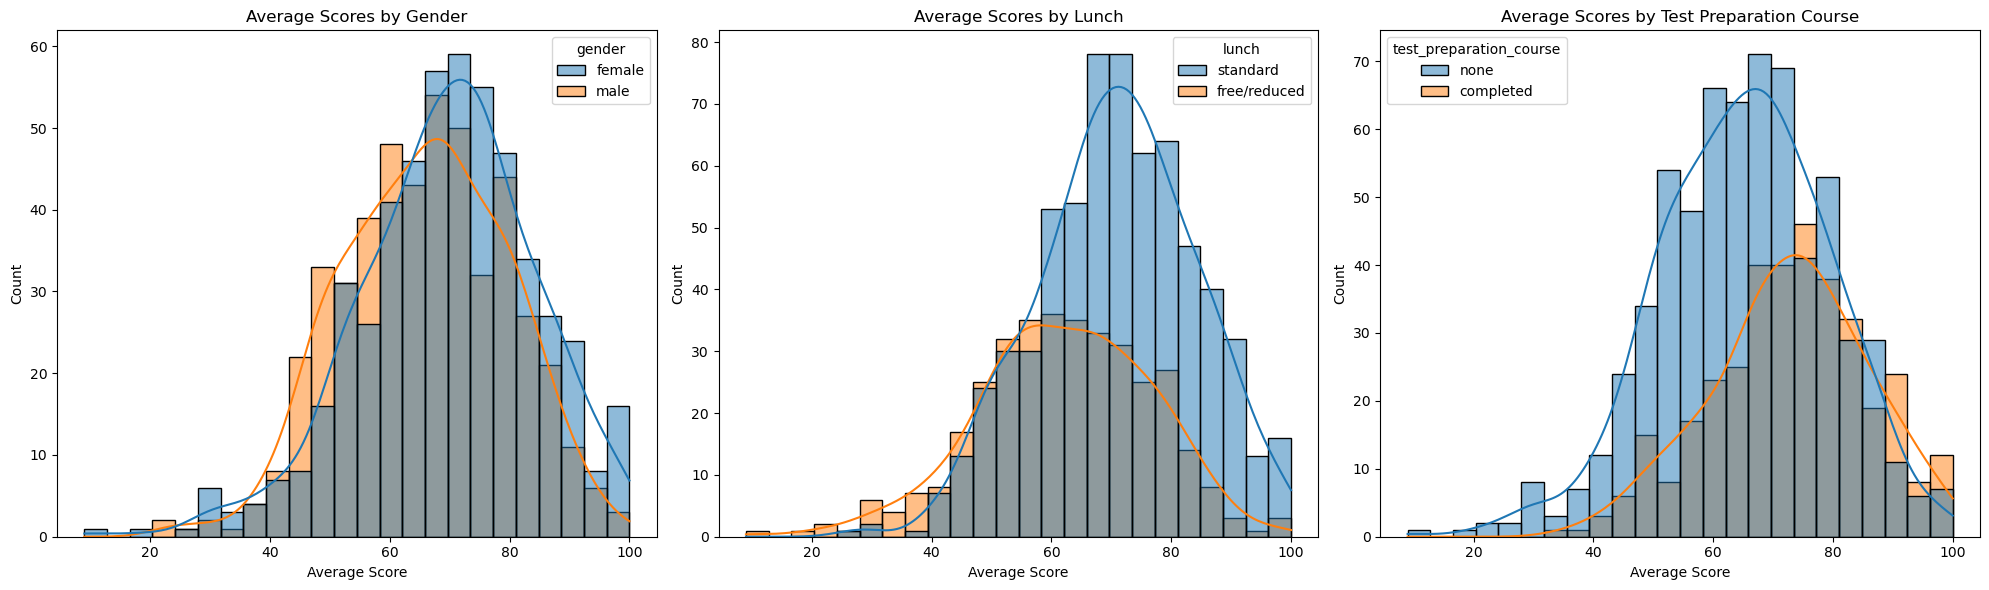

In [38]:
# List of categorical features, but only using the ones with few categories
categorical_features = ['gender', 'lunch', 'test_preparation_course']

# Create 1x3 grid (exactly what we need for 3 categories)
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, feature in enumerate(categorical_features):
    sns.histplot(data=df, x='average', kde=True, hue=feature, ax=axes[idx])
    axes[idx].set_title(f'Average Scores by {feature.replace("_", " ").title()}')
    axes[idx].set_xlabel('Average Score')
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

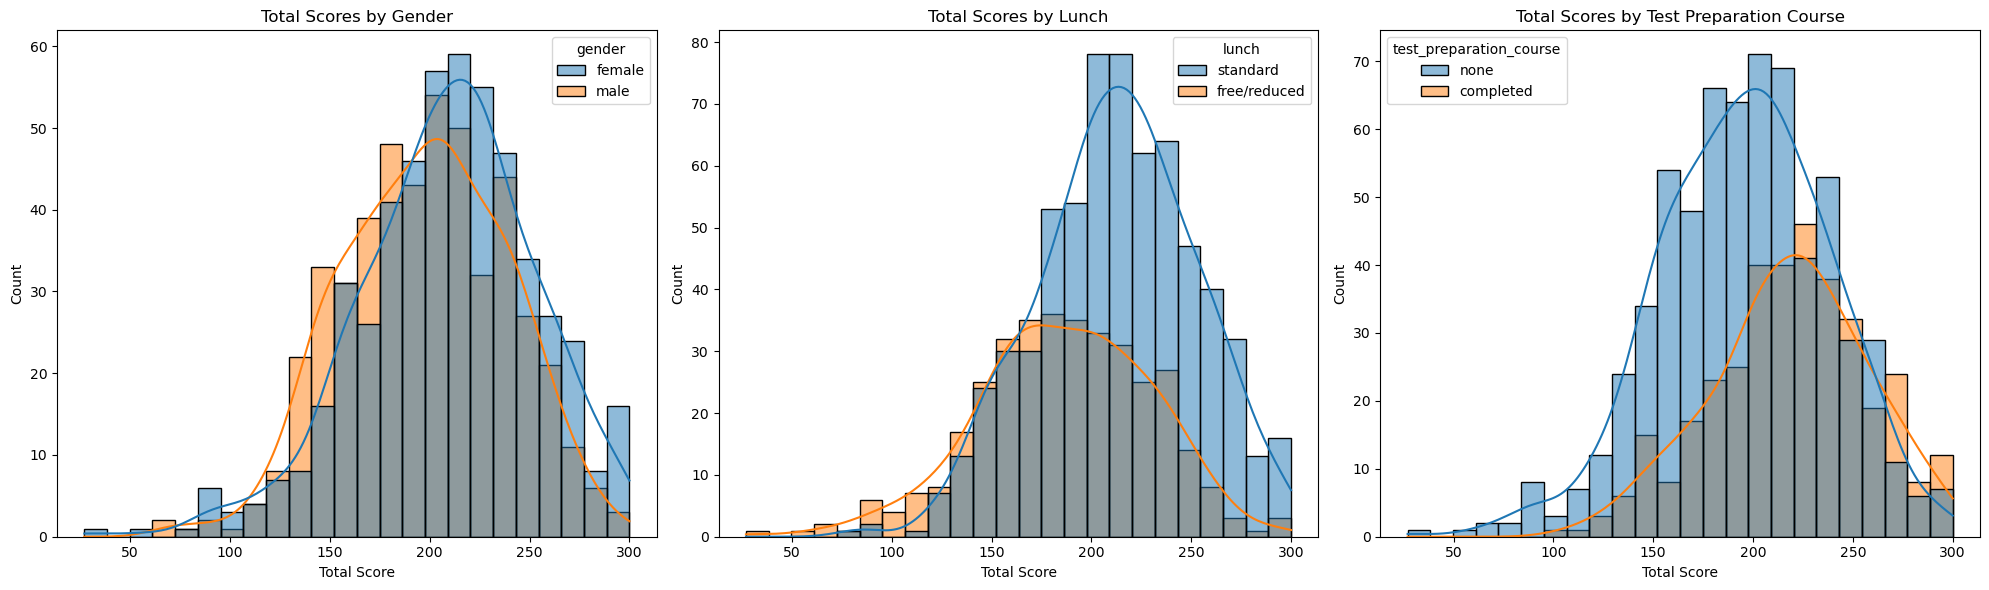

In [40]:
# Checking with respect to 'total_score'

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, feature in enumerate(categorical_features):
    sns.histplot(data=df, x='total_score', kde=True, hue=feature, ax=axes[idx])
    axes[idx].set_title(f'Total Scores by {feature.replace("_", " ").title()}')
    axes[idx].set_xlabel('Total Score')
    axes[idx].set_ylabel('Count')

plt.tight_layout()
plt.show()

### Insights

It seems female students tend to perform better than male. Having a standard paid lunch also show that you tend to have an overall better average and total_score. Surprisingly, students who have completed the test preparation course tend to perform much worse than people who have not.

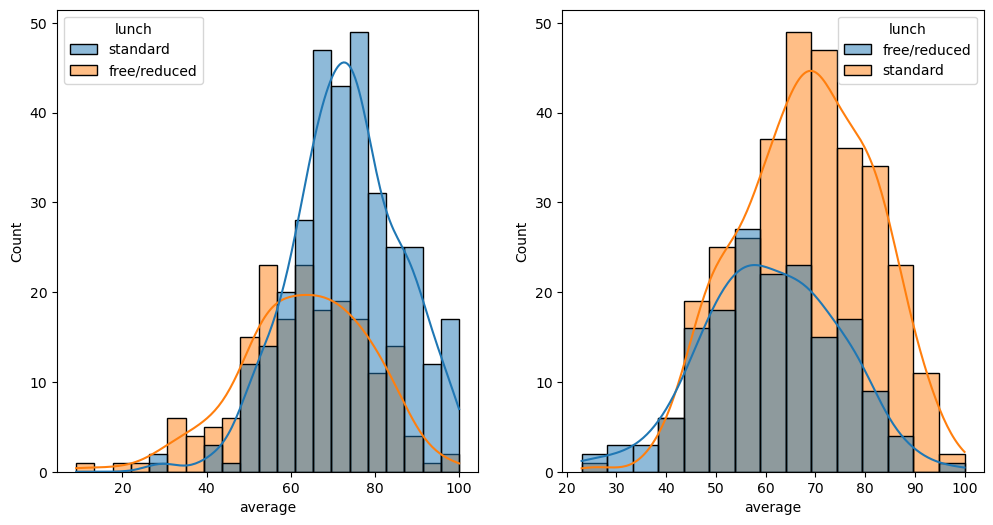

In [ ]:
# Checking male and female students on standard or reduced/free lunch
plt.subplots(1,3,figsize=(25,6))
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

### Insights

Regardless of gender, for both male and female we see that students with 'standard' lunch tend to perform higher that 'free/reduced'.

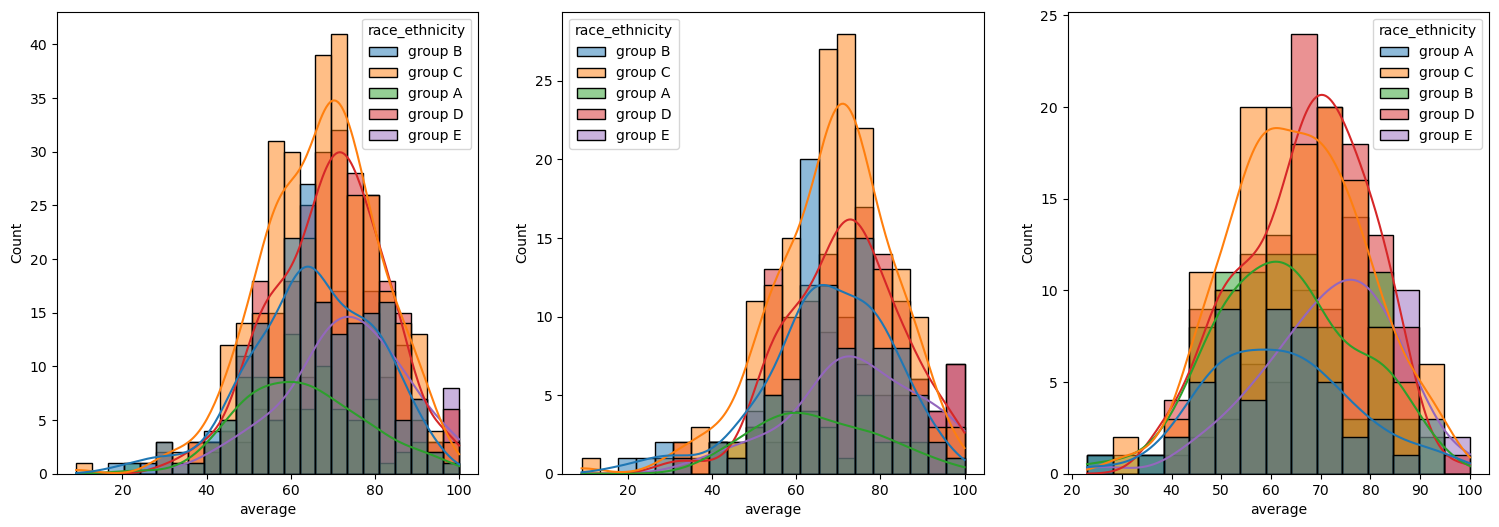

In [ ]:
# Checking features with more than 2-3 categories
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

### Insights

- Group C tends to perform quite well regardless of gender. But for males it seems that group D also performs quite well.
- Group A and B tends to perform poorly on exams on average, regardless of gender as well.
- For further explorations, we could check what sort of lunch they have, their test preparation etc, to search for patterns as to why they are performing so low,

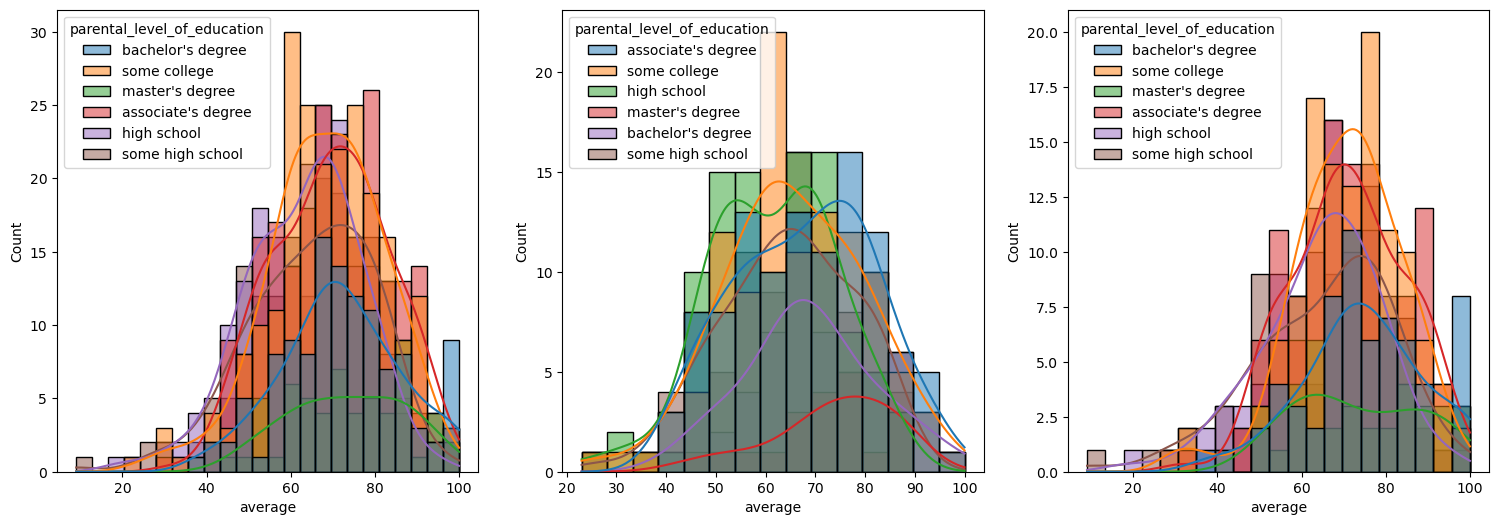

In [46]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education')
plt.show()

### Insights

- Not much correlation between parent's level of education and scores for females or in general
- Master's degree and associate's degree does tend to standout as high performers for males

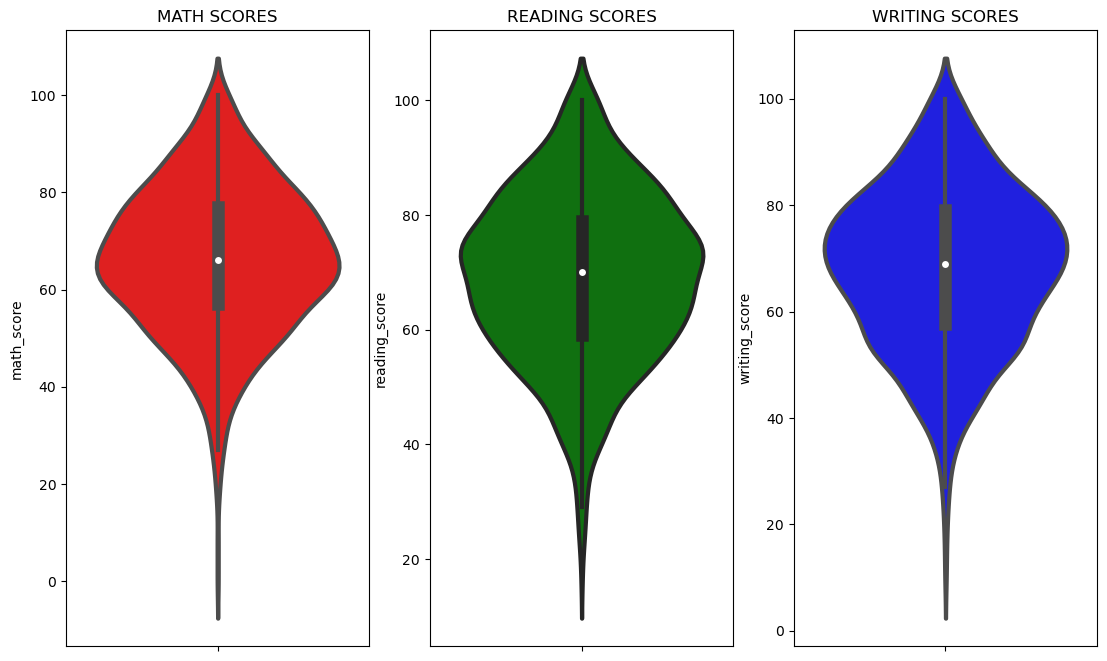

In [ ]:
# Maximum scores of students in all three subjects
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

### Insights

- We can see that students scores are in between 60-80 for math and for reading and writing it is between 50-80.
- Math also has the lowest, with reading being the highest.

### Multivariate Analysis using pieplot

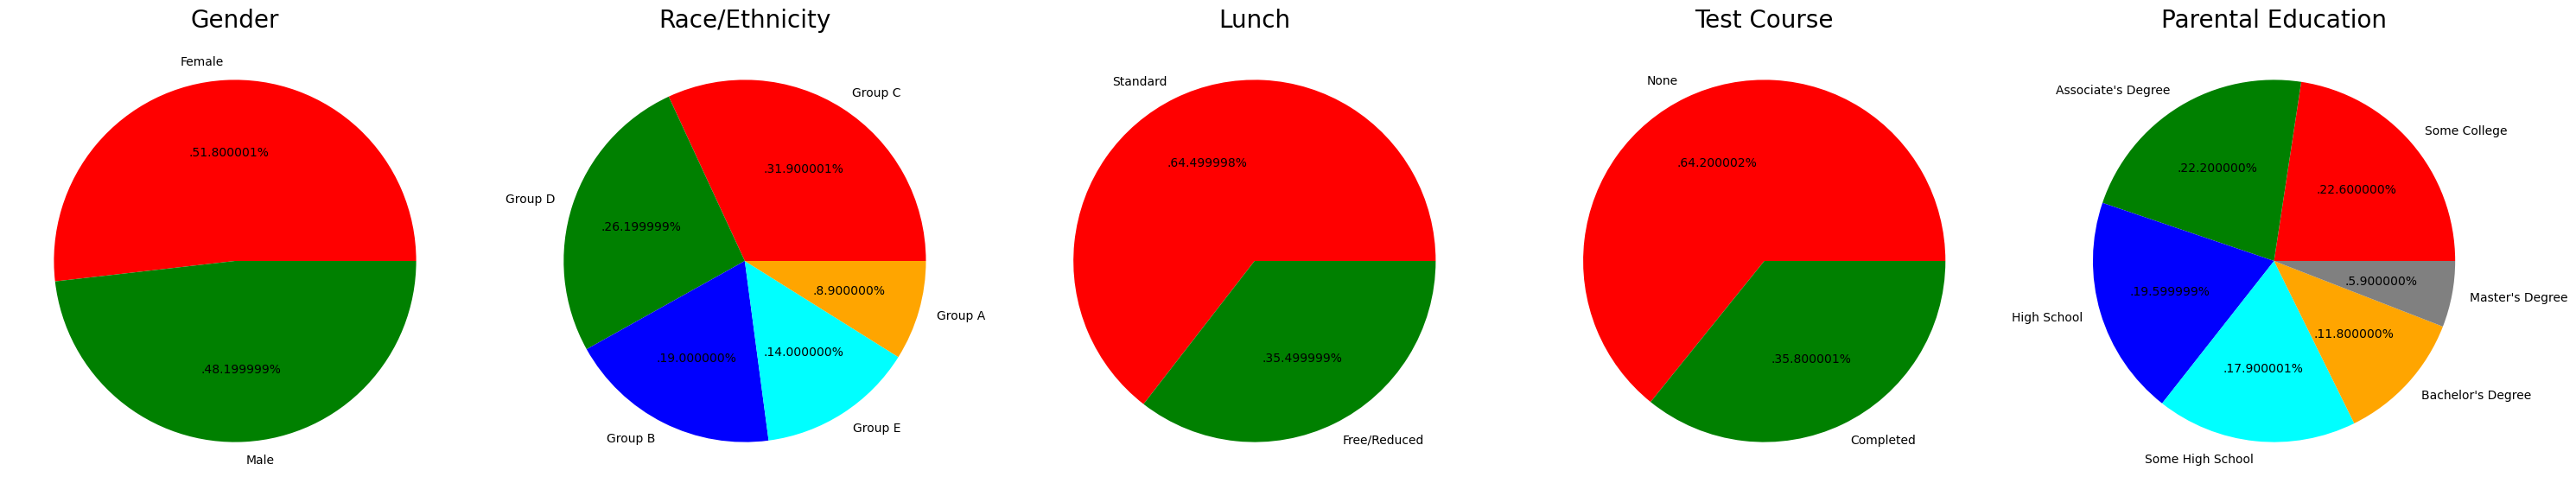

In [50]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free/Reduced'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

### Multivariate Analysis Insights

- For gender, the values are nearly equal
- Group C is the largest group, with D being the second
- Standard is more common that free/reduced
- None is more common that completed for test preparation course
- 'Some College' and 'Associate's Degree' are the two highest school level for parents

## 5. Feature Wise Visualization

Looking into each feature in more depth and how it impacts scores.

### Gender Column

- Checking the distribution of gender
- Does gender truly impact the student's performance?

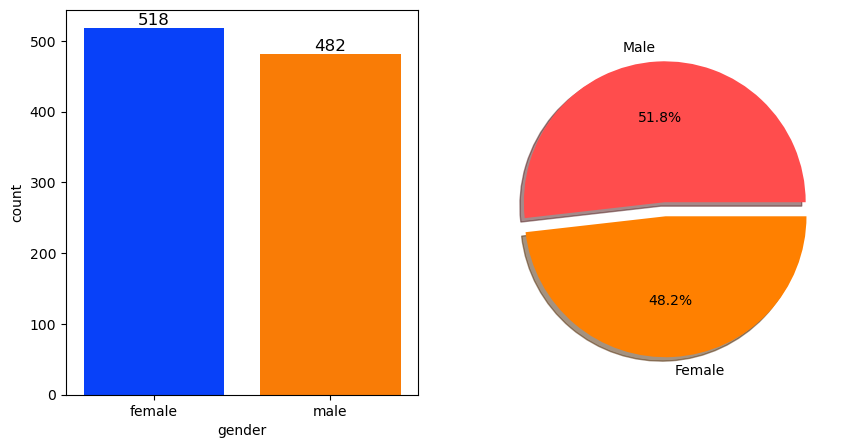

In [57]:
# Univariate analysis (Distribution of gender)
f, ax = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000'])
plt.show()

### Distribution

Quite balance, 52% females and 48% males.

In [58]:
gender_group = df.groupby('gender').mean()
gender_group

,math_score,reading_score,writing_score,total_score,average
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


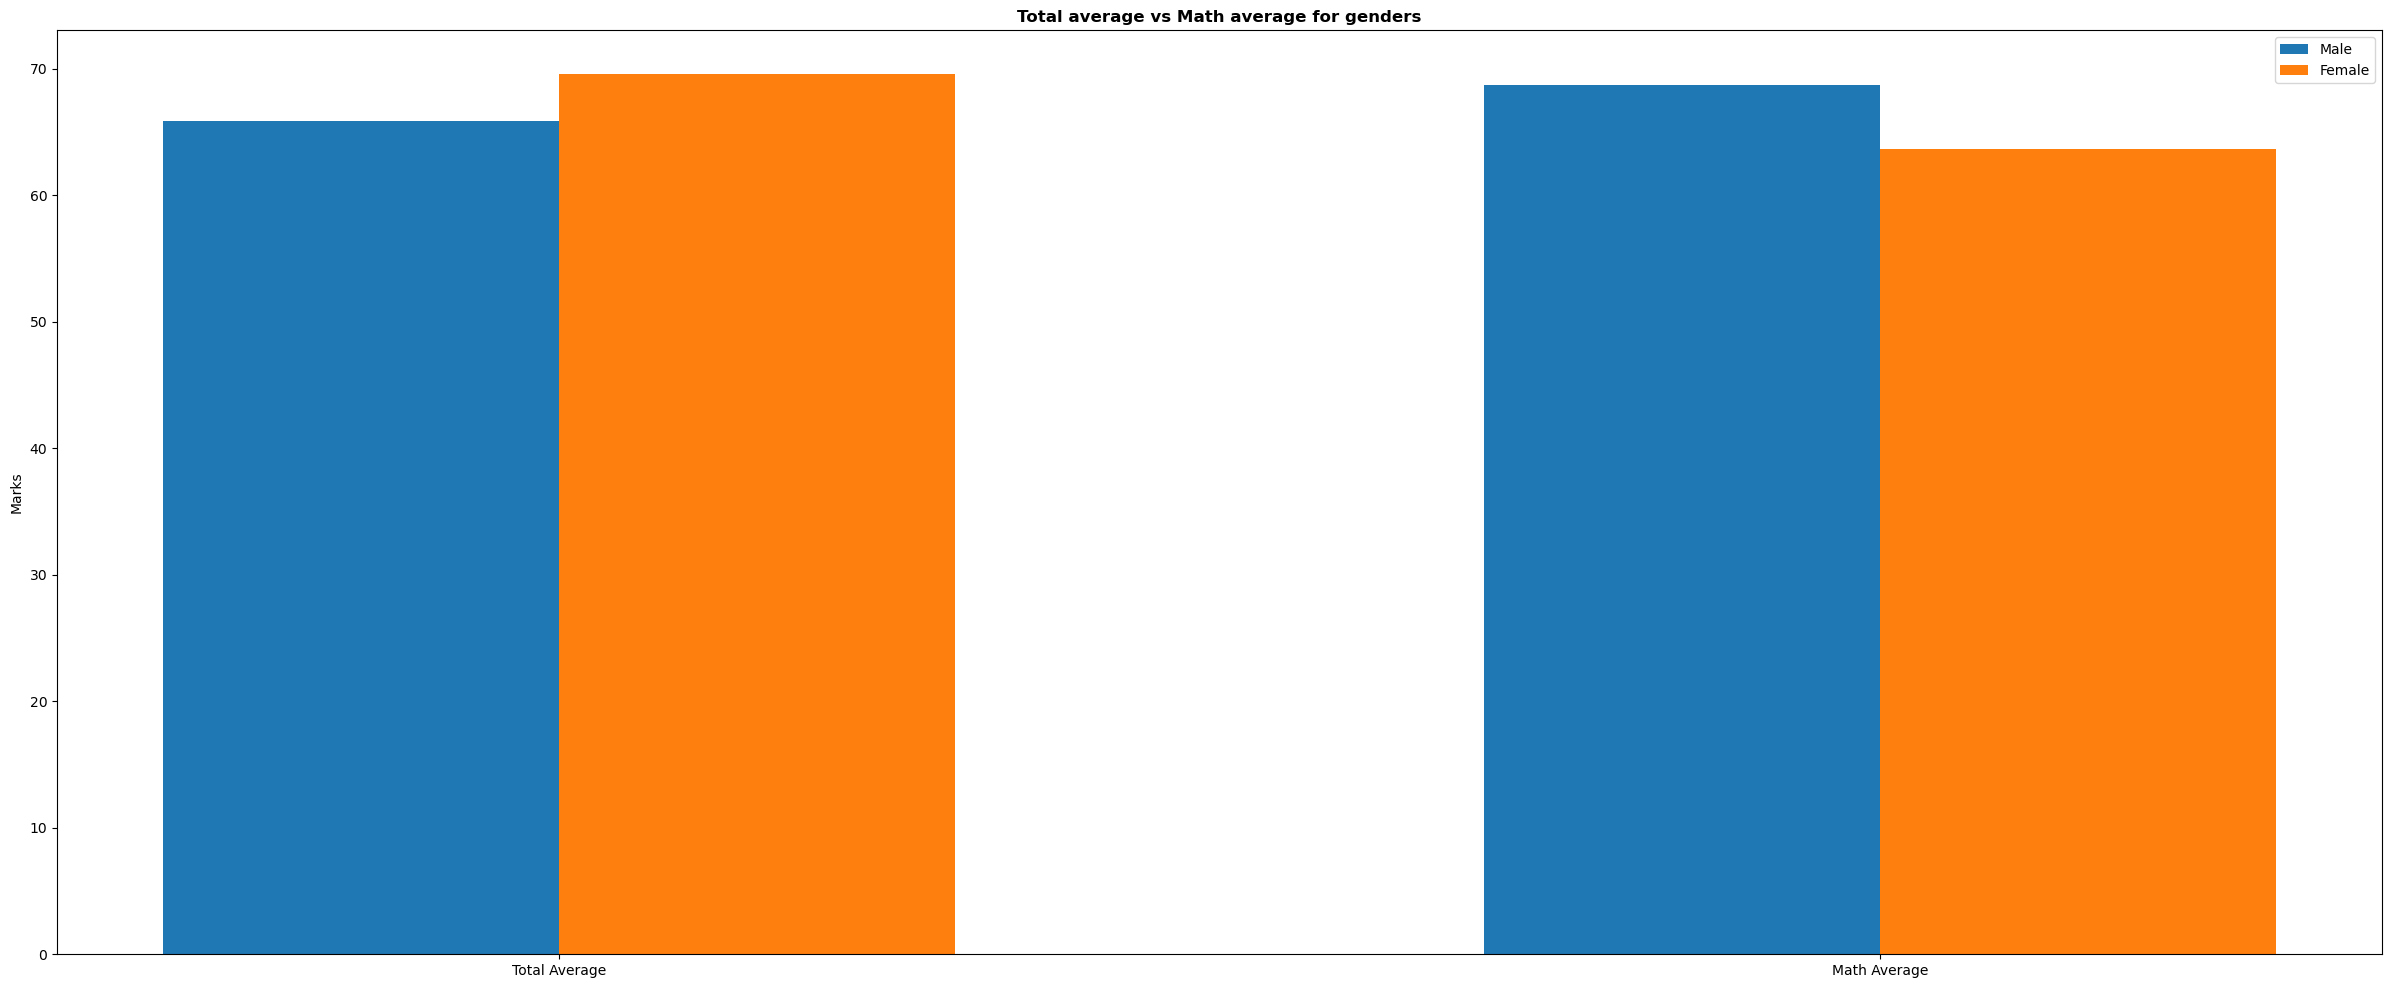

In [63]:
# Bivariate Analysis, gender and scores

X = ['Total Average', 'Math Average']
female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.15, male_scores, 0.3, label = 'Male')
plt.bar(X_axis + 0.15, female_scores, 0.3, label = 'Female')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average vs Math average for genders", fontweight='bold')
plt.legend()
plt.show()

### Insights

- Females tend to have a better average score than males
- Males tend to have a higher math score

### Race/Ethinicity Column

- Group wise distribution
- Race/Ethicity's impact on student's performance

But race_ethnicity has multiple categories unlike a binary like gender

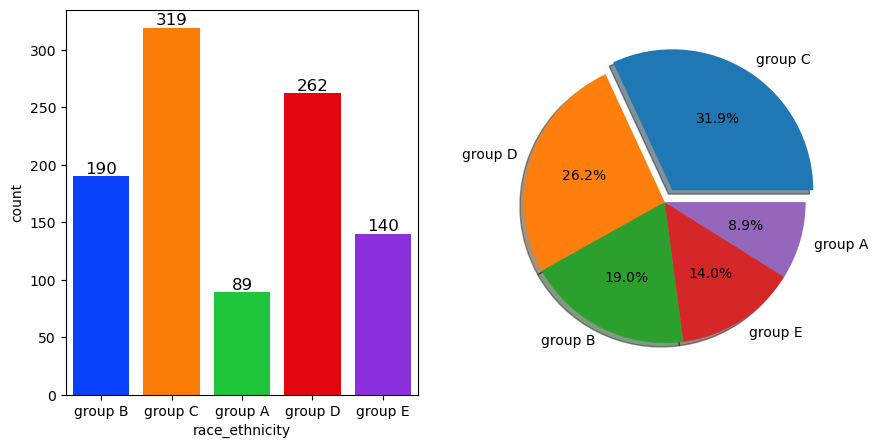

In [ ]:
f, ax = plt.subplots(1,2, figsize=(10,5))
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

plt.pie(x=df['race_ethnicity'].value_counts(), labels=df['race_ethnicity'].value_counts().index, explode=[0.1,0,0,0,0], autopct='%1.1f%%', shadow=True)
plt.show()

### Insights

- Group C is most common type of race/ethnicity
- Group A seems to be the least common

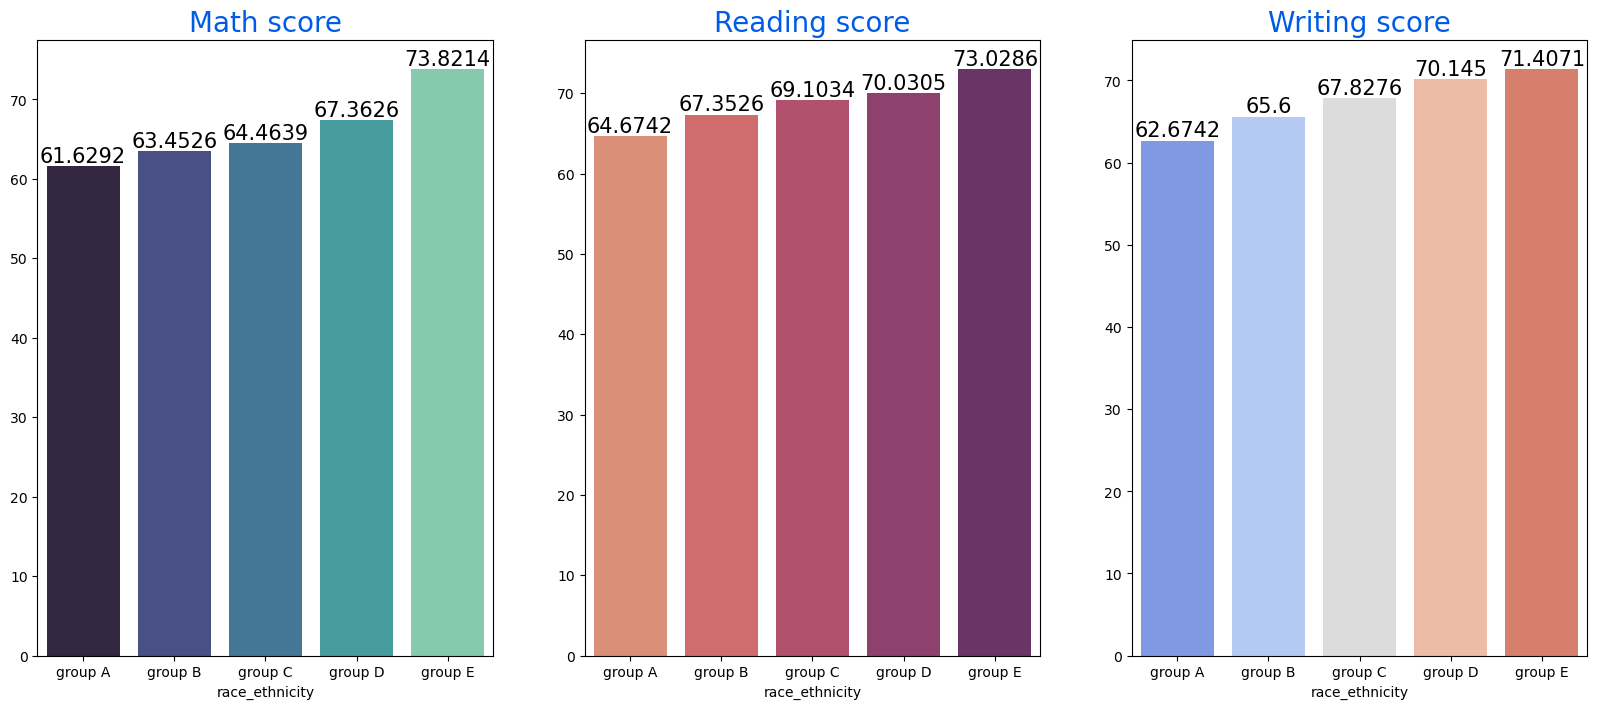

In [68]:
race_ethnicity_group=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_ethnicity_group['math_score'].mean().index,y=race_ethnicity_group['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=race_ethnicity_group['reading_score'].mean().index,y=race_ethnicity_group['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=race_ethnicity_group['writing_score'].mean().index,y=race_ethnicity_group['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

### Insights

- Scores for each groups are in a consistent rank for all subjects
- Group E is the highest performer and Group A is the lowest performer

### Parental Level of Education Column

- Student's parents educational background
- Does their level of education impact their kids scores?

In [74]:
df['parental_level_of_education']

0       bachelor's degree
1            some college
2         master's degree
3      associate's degree
4            some college
              ...        
995       master's degree
996           high school
997           high school
998          some college
999          some college
Name: parental_level_of_education, Length: 1000, dtype: object

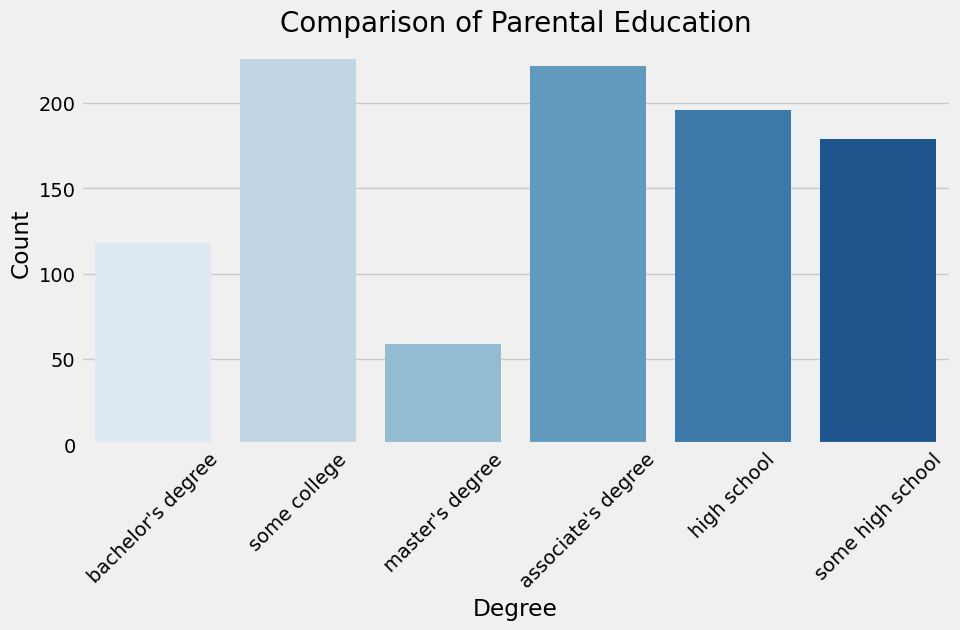

In [80]:
# Univariate Analysis, educational background of parents
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
sns.countplot(data=df, x='parental_level_of_education', palette='Blues')
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


### Insights

- Some college and associate's degree is most common

In [90]:
df_parents = df.groupby('parental_level_of_education').agg('mean')
parents_normal = df_parents.drop('total_score', axis=1)
parents_no_total = df_parents['total_score']

In [91]:
parents_normal

,math_score,reading_score,writing_score,average
parental_level_of_education,,,,
associate's degree,67.882883,70.927928,69.896396,69.569069
bachelor's degree,69.389831,73.000000,73.381356,71.923729
high school,62.137755,64.704082,62.448980,63.096939
master's degree,69.745763,75.372881,75.677966,73.598870
some college,67.128319,69.460177,68.840708,68.476401
some high school,63.497207,66.938547,64.888268,65.108007


In [92]:
parents_no_total

parental_level_of_education
associate's degree    208.707207
bachelor's degree     215.771186
high school           189.290816
master's degree       220.796610
some college          205.429204
some high school      195.324022
Name: total_score, dtype: float64

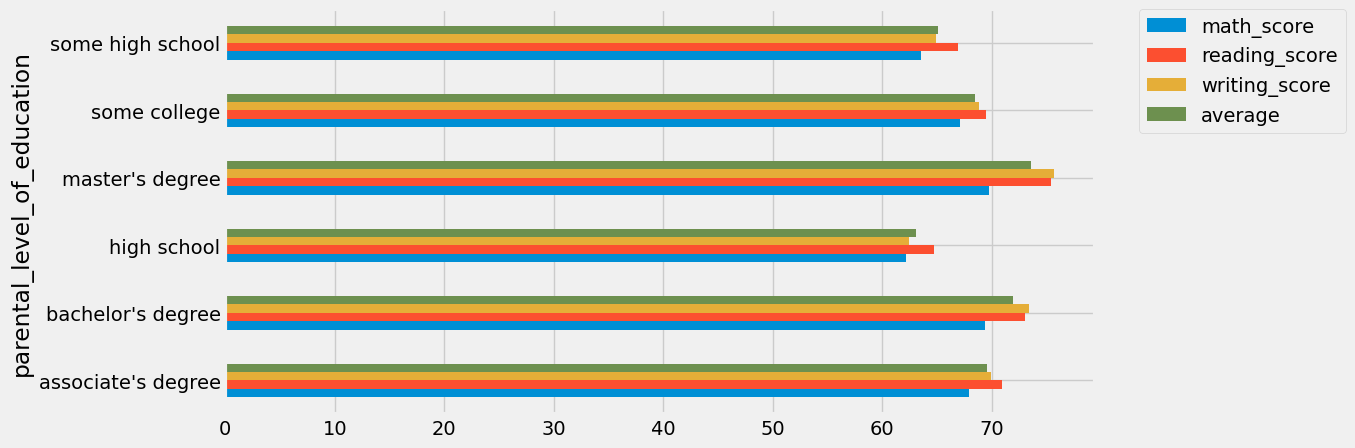

In [93]:
# Bivariate Analysis (Parent's educational impact on students)

# Checking average of all scores except total since they don't scale and is hard to read
parents_normal.plot(kind='barh', figsize=(10,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

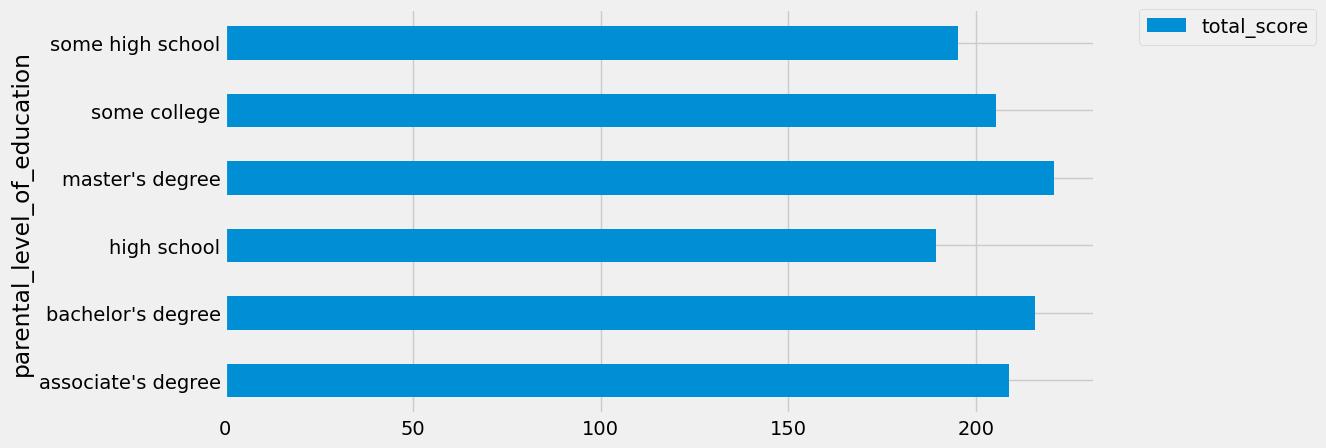

In [94]:
# Checking total scores now
parents_no_total.plot(kind='barh', figsize=(10,5))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Insights

- From both charts we can see that students with parents who have attended college tend to perform better than students whose parents went to high school.
- Students with parents who have 'master's degree' or 'bachelor's degree' performed the highest

### Lunch Column

- Which lunch type is most common among students?
- What is the effect of lunch type of student's scores?

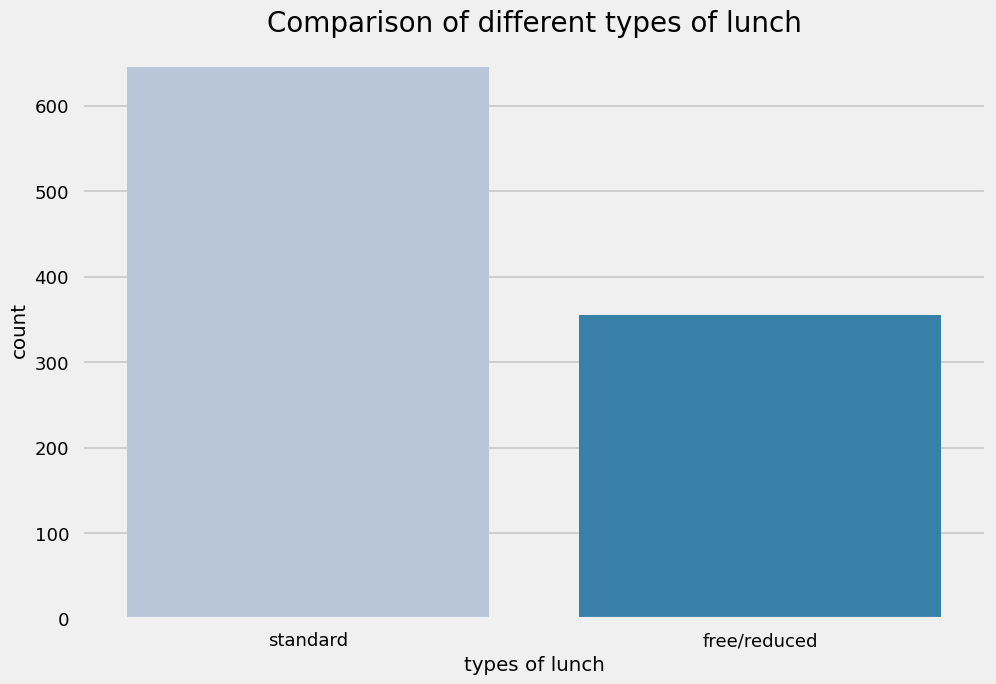

In [98]:
# Univariate Analysis (Lunch distribution)
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('seaborn-talk')
sns.countplot(data=df, x='lunch', palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()


### Insights

- Standard lunch is much more common than free/reduced

In [113]:
lunch_group = df.groupby('lunch').mean()
lunch_group

,math_score,reading_score,writing_score,total_score,average
lunch,,,,,
free/reduced,58.921127,64.653521,63.022535,186.597183,62.199061
standard,70.034109,71.654264,70.823256,212.511628,70.837209


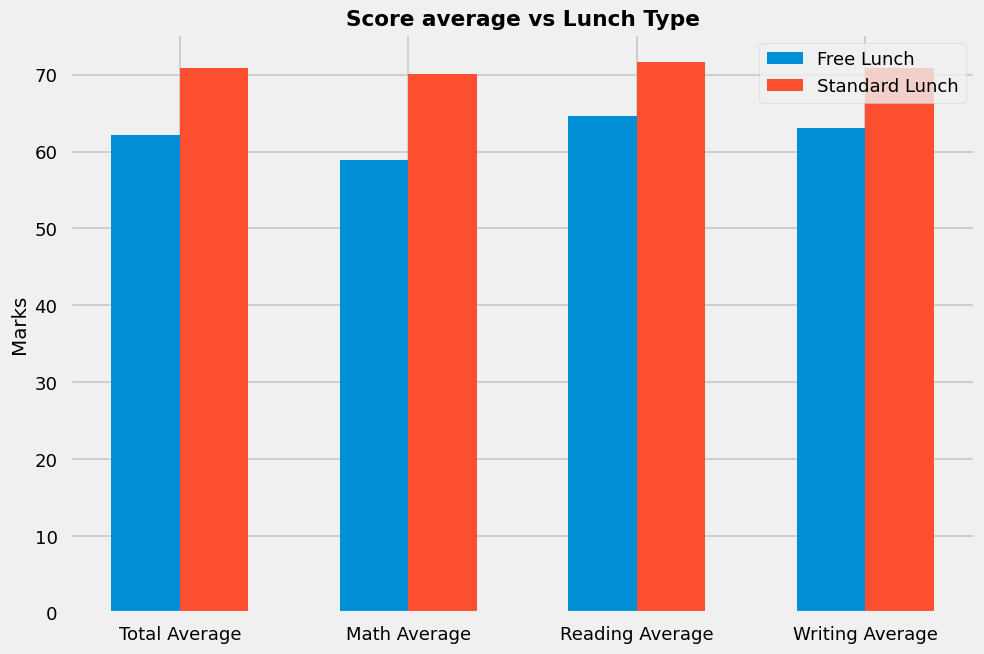

In [125]:
X = ['Total Average', 'Math Average', 'Reading Average', 'Writing Average']
free = [lunch_group['average'][0], lunch_group['math_score'][0], lunch_group['reading_score'][0], lunch_group['writing_score'][0]]
standard = [lunch_group['average'][1], lunch_group['math_score'][1], lunch_group['reading_score'][1], lunch_group['writing_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.15, free, 0.3, label = 'Free Lunch')
plt.bar(X_axis + 0.15, standard, 0.3, label = 'Standard Lunch')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Score average vs Lunch Type", fontweight='bold')
plt.legend()
plt.show()

### Insights

- Students on free/reduced lunch tend to perform worse than students on standard lunch.

### Test Preparation Column

- Test Preparation Distribution
- Does test preparation help students achieve better results?

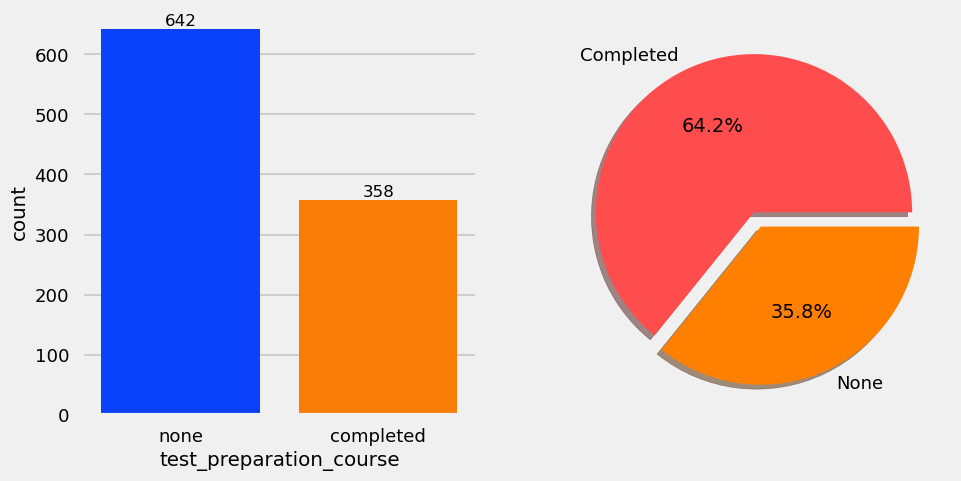

In [116]:
# Univariate analysis (Distribution of test prep)
f, ax = plt.subplots(1, 2, figsize=(10,5))
sns.countplot(x=df['test_preparation_course'], data=df, palette='bright', ax=ax[0], saturation=0.95)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=12)

plt.pie(x=df['test_preparation_course'].value_counts(), labels=['Completed', 'None'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#ff4d4d','#ff8000'])
plt.show()

### Insights

- More students have completed the test preparation course

In [117]:
test_group = df.groupby('test_preparation_course').mean()
test_group

,math_score,reading_score,writing_score,total_score,average
test_preparation_course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669460
none,64.077882,66.534268,64.504673,195.116822,65.038941


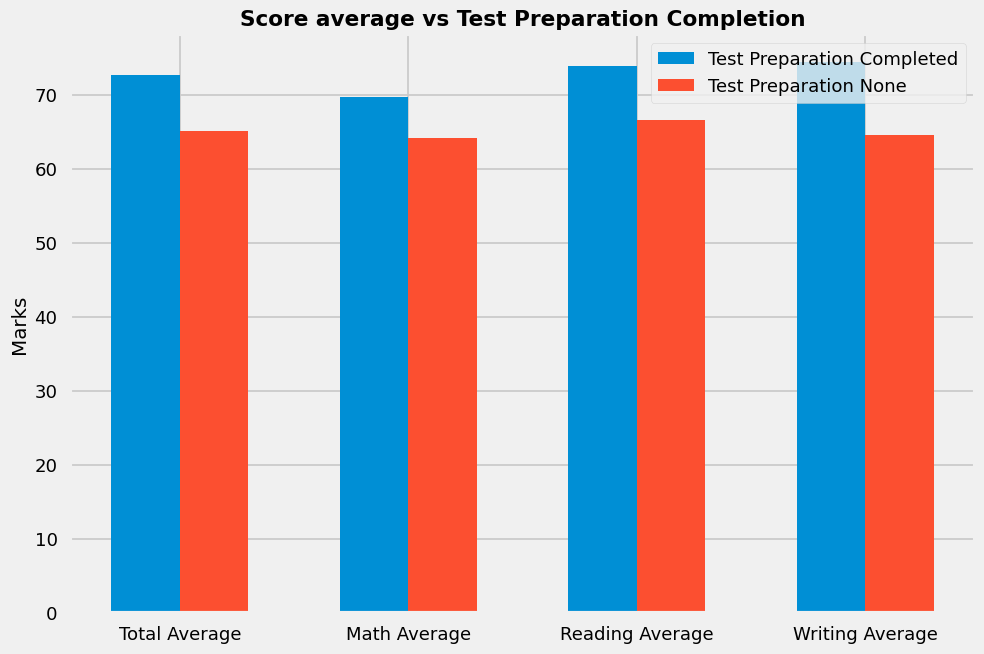

In [118]:
X = ['Total Average', 'Math Average', 'Reading Average', 'Writing Average']
yes_prep = [test_group['average'][0], test_group['math_score'][0], test_group['reading_score'][0], test_group['writing_score'][0]]
no_prep = [test_group['average'][1], test_group['math_score'][1], test_group['reading_score'][1], test_group['writing_score'][1]]

X_axis = np.arange(len(X))

plt.bar(X_axis - 0.15, yes_prep, 0.3, label = 'Test Preparation Completed')
plt.bar(X_axis + 0.15, no_prep, 0.3, label = 'Test Preparation None')

plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Score average vs Test Preparation Completion", fontweight='bold')
plt.legend()
plt.show()

### Insights

- Students who have completed the test preparation course have higher scores in general average but also all the different subjects.

### 5. Checking Outliers

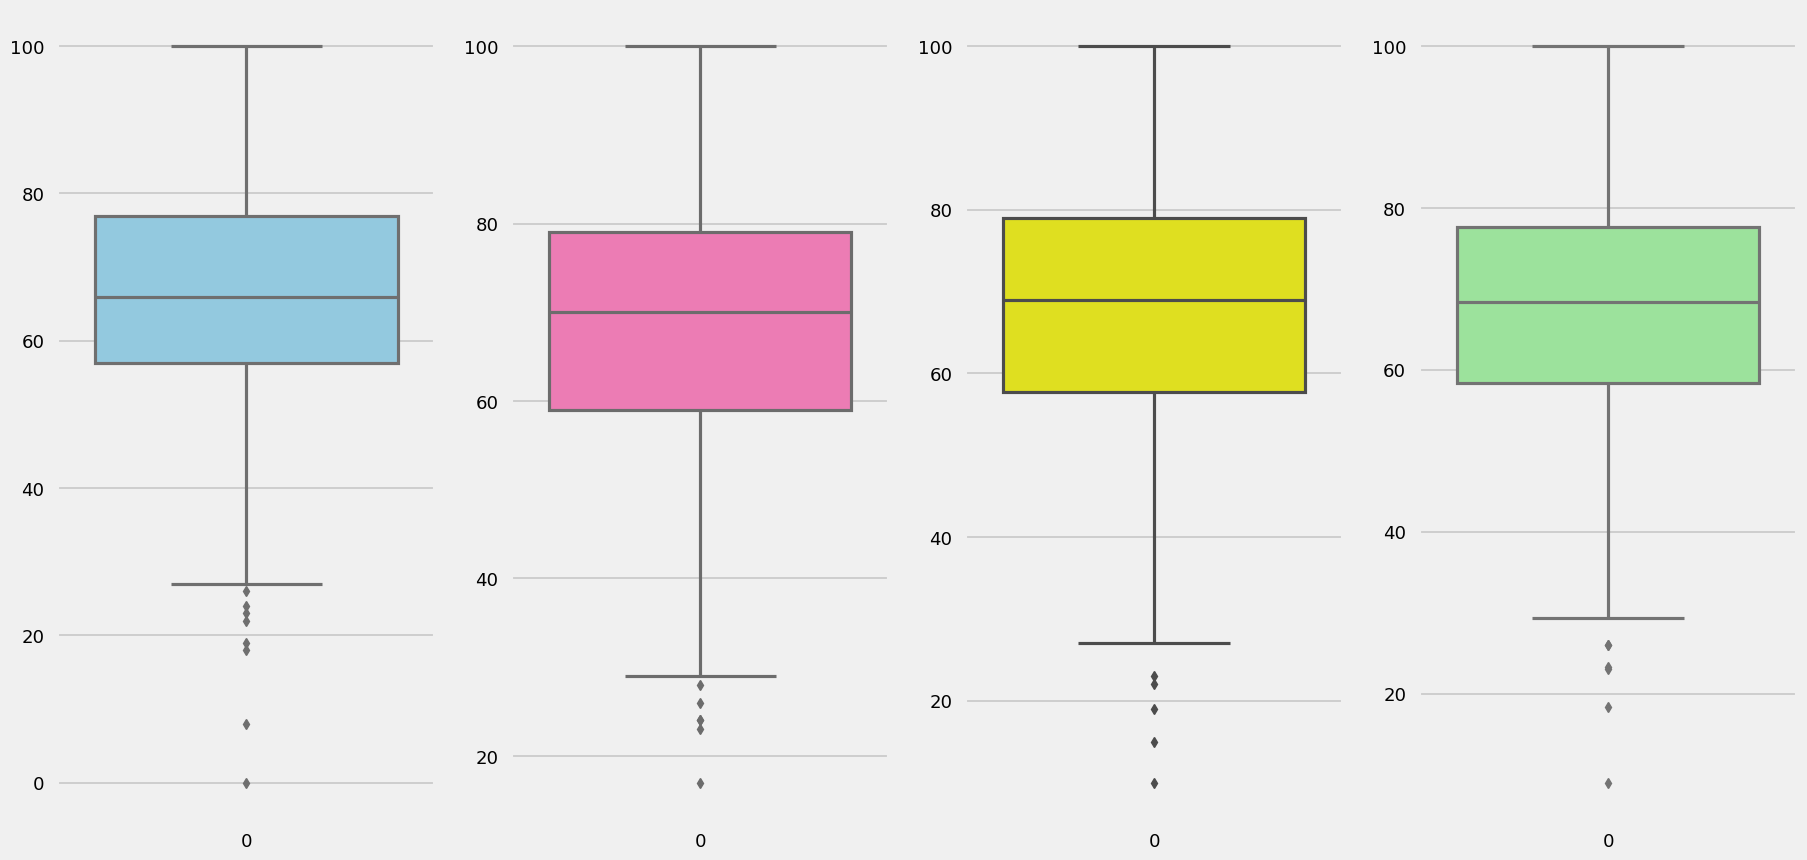

In [126]:
plt.subplots(1, 4, figsize=(20,10))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

### Insights

- There are quite a few outliers, on average they are usually below the score of 40 which is significantly less than majority of the students who are more in the 60 to 80 range.

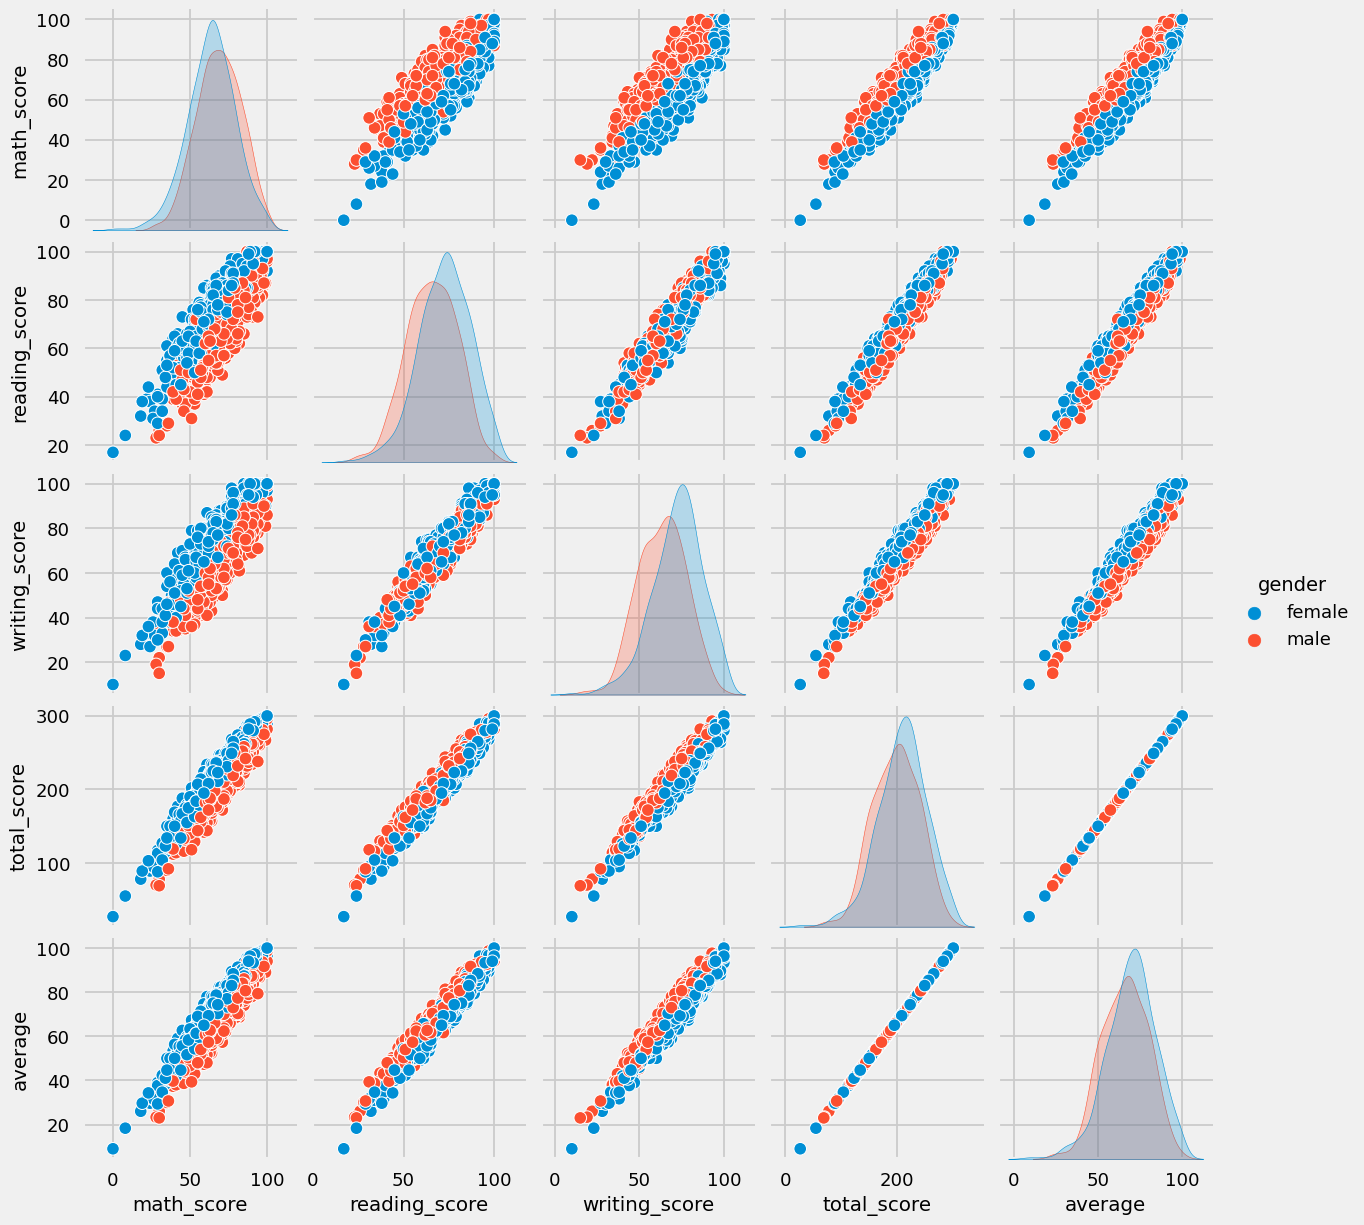

In [127]:
# Multivariate analysis using a pairplot
sns.pairplot(df, hue='gender')
plt.show()

### Insights

- Obviously the scores will have high correlation with total_score and average score, because we used those features to create them. But between math, reading, and writing scores only, we can see all of them also have high correlation.
- Throughout our EDA, we have seen that all the other non-numerical features results in similar scores in any subject so no huge surprise here.

## 6. Conclusions

Through our EDA we can confidently say that:
- Student's performance is indeed correlated with all the other non-numerical features
- Female students tend to outperform males
- Test preparation doesn't seem to have huge correlation with scores but we do see that test prep completion seem to benefit students